In [22]:
## Part I - WeatherPy
#  Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import json
from pprint import pprint


# Import API keys
from config import weather_api_key
from config import g_key

In [23]:
# Incorporated citipy to determine city based on lat and lng
from citipy import citipy

In [31]:
# Output File (CSV)
unclean_cities_pd = pd.read_csv("output_data/cities.csv")
unclean_cities_pd.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [33]:
date = unclean_cities_pd.groupby('Date').count()
date.count()

City_ID       175
City          175
Cloudiness    175
Country       175
Humidity      175
Lat           175
Lng           175
Max Temp      175
Wind Speed    175
dtype: int64

In [39]:
date= unclean_cities_pd.groupby('Date').nunique()
date.nunique()

City_ID       8
City          8
Cloudiness    7
Country       9
Humidity      8
Lat           8
Lng           8
Max Temp      8
Wind Speed    8
dtype: int64

In [40]:
duplicate_ids = unclean_cities_pd.loc[unclean_cities_pd.duplicated(subset=["Date","City_ID"]),"Date"].nunique()
duplicate_ids

0

In [41]:
cities_pd= len(unclean_cities_pd["Date"].unique())

In [42]:
# create a params dict that will be updated with new city each iteration
params = {"key": g_key}

In [43]:
# Range of lat and lng
lat_range = (-90, 90)
lng_range = (-180, 180)# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [44]:
# Create weather list
weather = []

# Set unit as imperial
unit = "imperial"

# Set counter for record, set and timesleep
x = 1
y = 1
z = 0

# print line to track status
print(f"Beginning Data Retrieval")

# Create for loop to perform API calls for each city
for city in cities:
    
    #print line to see status of retrieval
    print(f"Processing Record {x} of Set {y} | {city}")
    
    #set url
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    #try to retrieve the data
    try:
        response = requests.get(query_url).json()
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        temp_max = response['main']['temp_max']
        humid = response['main']['humidity']
        cloud = response ['clouds']['all']
        date = response['dt']
        wind = response['wind']['speed']
        country = response['sys']['country']
        dict = {'City': city,'Lat': lat, 'Lng': lng, 'Max Temp': temp_max, 'Humidity' : humid, 'Cloudiness' : cloud, 'Date':date, \
                'Wind Speed' : wind, 'Country':country}
        weather.append(dict)
    
    # except for keyError
    except KeyError:
        print(f"There was a Key Error")
        z = z+1
        
    # Add 1 to counters and set time sleep
    x += 1
    if x % 60 == 0:
        time.sleep(60)
        y +=1

# Get total key errors
print(f"There were {z} keyErrors")

Beginning Data Retrieval
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | adrar
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | grenada
Processing Record 8 of Set 1 | micco
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | sakakah
Processing Record 17 of Set 1 | umm lajj
Processing Record 18 of Set 1 | namanyere
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | blonduos
There was a Key Error
Processing Record 22 of Set 1 | jalu
Processing Record 23 of Set 1 | biskamzha
Pro

Processing Record 188 of Set 4 | tiksi
Processing Record 189 of Set 4 | chuy
Processing Record 190 of Set 4 | bur gabo
There was a Key Error
Processing Record 191 of Set 4 | yumen
Processing Record 192 of Set 4 | camana
Processing Record 193 of Set 4 | canto do buriti
Processing Record 194 of Set 4 | skagastrond
There was a Key Error
Processing Record 195 of Set 4 | vardo
Processing Record 196 of Set 4 | nikolskoye
Processing Record 197 of Set 4 | port shepstone
Processing Record 198 of Set 4 | ust-omchug
Processing Record 199 of Set 4 | saldanha
Processing Record 200 of Set 4 | miraflores
Processing Record 201 of Set 4 | beloha
Processing Record 202 of Set 4 | andevoranto
There was a Key Error
Processing Record 203 of Set 4 | sehithwa
Processing Record 204 of Set 4 | la ronge
Processing Record 205 of Set 4 | morant bay
Processing Record 206 of Set 4 | morolica
There was a Key Error
Processing Record 207 of Set 4 | ostrovnoy
Processing Record 208 of Set 4 | oga
Processing Record 209 of

Processing Record 376 of Set 7 | timra
Processing Record 377 of Set 7 | flinders
Processing Record 378 of Set 7 | mandalgovi
Processing Record 379 of Set 7 | yirol
There was a Key Error
Processing Record 380 of Set 7 | sola
Processing Record 381 of Set 7 | cayenne
Processing Record 382 of Set 7 | pyapon
Processing Record 383 of Set 7 | shelburne
Processing Record 384 of Set 7 | lalibela
Processing Record 385 of Set 7 | fairbanks
Processing Record 386 of Set 7 | vila velha
Processing Record 387 of Set 7 | bushehr
Processing Record 388 of Set 7 | kargat
Processing Record 389 of Set 7 | new ulm
Processing Record 390 of Set 7 | biak
Processing Record 391 of Set 7 | dunedin
Processing Record 392 of Set 7 | dolinsk
Processing Record 393 of Set 7 | harper
Processing Record 394 of Set 7 | plettenberg bay
Processing Record 395 of Set 7 | cherepovets
Processing Record 396 of Set 7 | mehamn
Processing Record 397 of Set 7 | eydhafushi
Processing Record 398 of Set 7 | slave lake
Processing Record 3

Processing Record 564 of Set 10 | chara
Processing Record 565 of Set 10 | san quintin
Processing Record 566 of Set 10 | puerto escondido
Processing Record 567 of Set 10 | nyurba
Processing Record 568 of Set 10 | paucartambo
There was a Key Error
Processing Record 569 of Set 10 | aliquippa
Processing Record 570 of Set 10 | shingu
Processing Record 571 of Set 10 | yuli
Processing Record 572 of Set 10 | solnechnyy
Processing Record 573 of Set 10 | seddon
Processing Record 574 of Set 10 | gimli
Processing Record 575 of Set 10 | cam ranh
Processing Record 576 of Set 10 | nuevo progreso
Processing Record 577 of Set 10 | jingdezhen
Processing Record 578 of Set 10 | kadykchan
There was a Key Error
Processing Record 579 of Set 10 | guerrero negro
Processing Record 580 of Set 10 | curup
Processing Record 581 of Set 10 | ciudad bolivar
Processing Record 582 of Set 10 | anadyr
Processing Record 583 of Set 10 | thinadhoo
Processing Record 584 of Set 10 | santa rosa
Processing Record 585 of Set 10 |

In [47]:
#Create dataframe from list of data retrieved
weather_df = pd.DataFrame(weather)


In [48]:
# Drop empty fields
weather_df = weather_df.dropna()


In [49]:
# Save the dataframe as a csv file
weather_df.to_csv('weather_output.csv', index = False)

# Print the dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country
0,carnarvon,-24.8667,113.6333,64.47,82,82,1622146134,4.61,AU
1,laguna,38.4210,-121.4238,87.24,35,1,1622146135,4.00,US
2,hobart,-42.8794,147.3294,44.02,82,75,1622146122,1.99,AU
3,saskylakh,71.9167,114.0833,28.60,85,100,1622146136,5.30,RU
4,adrar,20.5022,-10.0711,98.42,13,59,1622146136,6.51,MR
...,...,...,...,...,...,...,...,...,...
580,sorland,67.6670,12.6934,42.87,77,100,1622146923,11.81,NO
581,saryg-sep,51.5000,95.6000,52.95,91,100,1622146924,4.34,RU
582,ibra,22.6906,58.5334,89.67,19,1,1622146924,2.13,OM
583,raudeberg,61.9875,5.1352,59.67,84,4,1622146924,19.80,NO


In [52]:
#check for humidity >100
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed
count,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02,585.000000
mean,19.778719,21.395822,64.980205,69.480342,54.873504,1.622146e+09,7.793350
std,33.645135,90.658956,17.373697,22.313689,39.886625,2.443666e+02,5.686109
min,-54.800000,-175.200000,12.780000,7.000000,0.000000,1.622146e+09,0.000000
25%,-6.216700,-57.557500,51.980000,57.000000,12.000000,1.622146e+09,3.600000
50%,22.754500,27.849200,66.380000,75.000000,67.000000,1.622146e+09,6.040000
75%,50.100100,101.500000,78.980000,87.000000,98.000000,1.622147e+09,10.360000
max,78.218600,178.416700,103.280000,100.000000,100.000000,1.622147e+09,31.030000


In [ ]:
#Chart shows no Humidity >100

In [53]:
#Generate a timestamp for date data was ran (to use in plots)
today = pd.to_datetime("today").strftime("%m/%d/%Y")
today

'05/28/2021'

In [57]:
# Choose ggplot as style for plots
plt.style.use('ggplot')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

Text(0, 0.5, 'Max Temperature (F)')

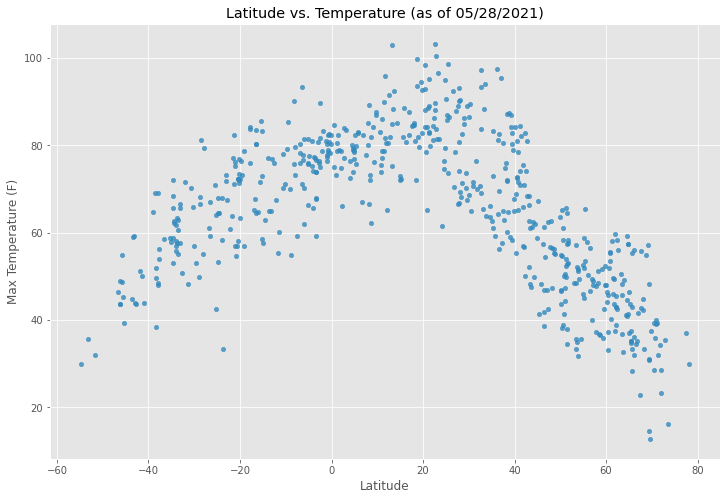

In [62]:
#Create scatter plot for lat vs temp
weather_df.plot(x ='Lat', y='Max Temp', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Temperature (as of {today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


Text(0, 0.5, 'Humidity (%)')

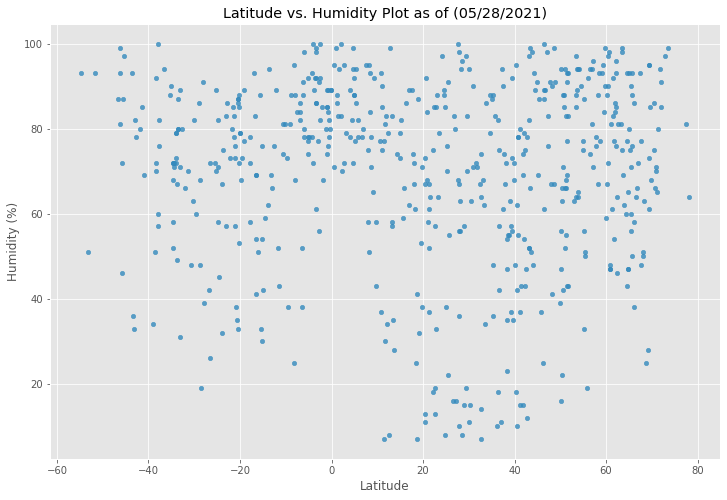

In [63]:
# Generate scatter plot for lat vs humidity
weather_df.plot(x ='Lat', y='Humidity', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Humidity Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


Text(0, 0.5, 'Cloudiness (%)')

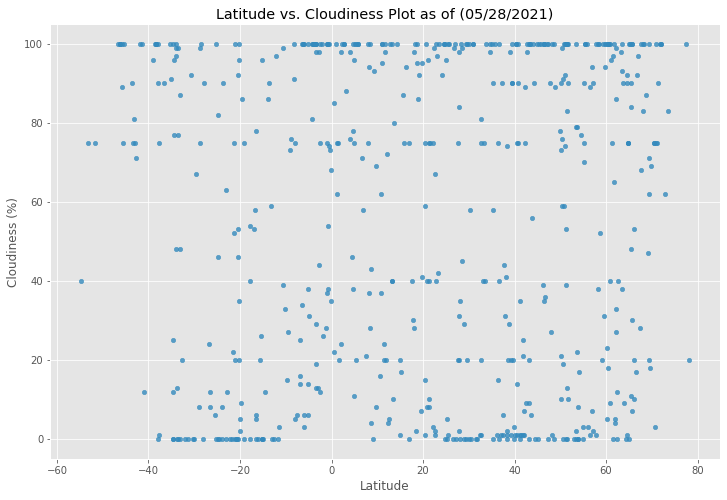

In [64]:
# Generate scatter plot for lat vs cloudiness
weather_df.plot(x ='Lat', y='Cloudiness', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Cloudiness Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

Text(0, 0.5, 'Wind Speed (mph)')

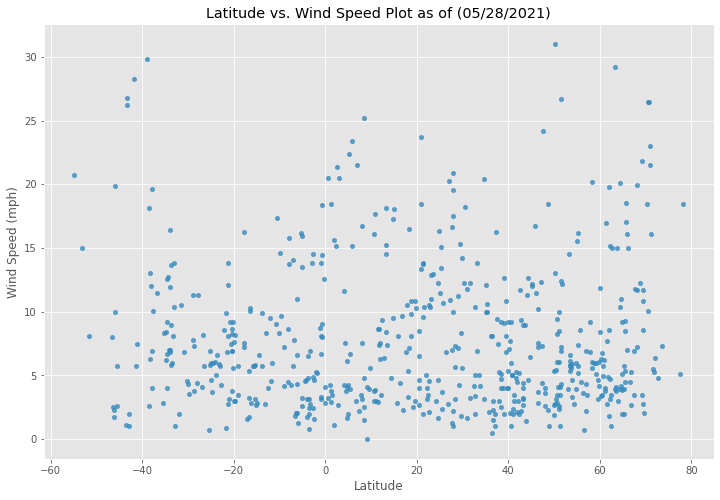

In [65]:
# Generate scatter plot for lat vs wind speed
weather_df.plot(x ='Lat', y='Wind Speed', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Wind Speed Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

In [66]:
#linear regression
n_hem = weather_df.loc[weather_df["Lat"] >= 0, 'Lat']
s_hem = weather_df.loc[weather_df["Lat"] < 0, 'Lat']
n_hem_temp =  weather_df.loc[weather_df["Lat"] >= 0,'Max Temp']
s_hem_temp =  weather_df.loc[weather_df["Lat"] < 0,'Max Temp']
n_hem_hum =  weather_df.loc[weather_df["Lat"] >= 0,'Humidity']
s_hem_hum =  weather_df.loc[weather_df["Lat"] < 0,'Humidity']
n_hem_cloud =  weather_df.loc[weather_df["Lat"] >= 0,'Cloudiness']
s_hem_cloud =  weather_df.loc[weather_df["Lat"] < 0,'Cloudiness']
n_hem_wind =  weather_df.loc[weather_df["Lat"] >= 0,'Wind Speed']
s_hem_wind =  weather_df.loc[weather_df["Lat"] < 0,'Wind Speed']

-0.8173612689147087


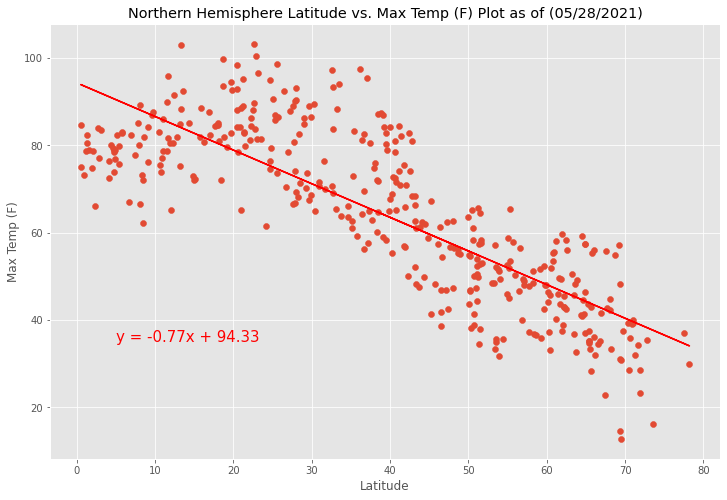

In [70]:
#Northern hemisphere: max temp vs lat...  linear regression
# Set x and y values
x_values = n_hem
y_values = n_hem_temp

#regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# Create title, labels
plt.title(f"Northern Hemisphere Latitude vs. Max Temp (F) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(rvalue)

0.7504373203703878


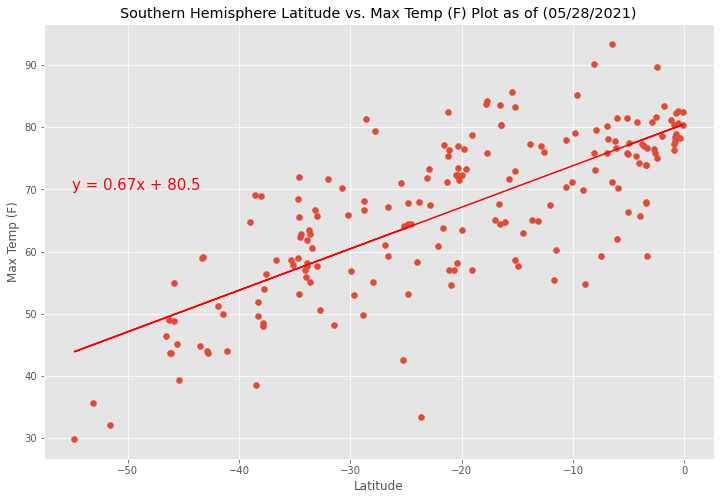

In [71]:
#Southern Hemisphere - Max Temp vs. Lat... Linear Regression
# Set x and y values
x_values = s_hem
y_values = s_hem_temp

#regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")

# Creates titles, labels
plt.title(f"Southern Hemisphere Latitude vs. Max Temp (F) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(rvalue)

0.06704914059305561


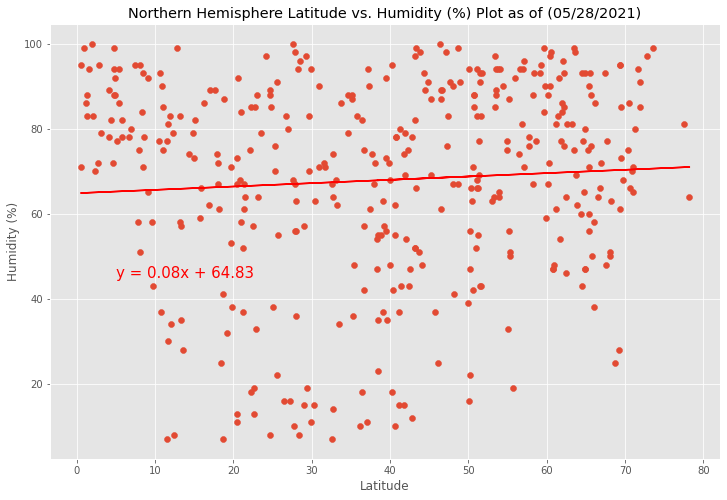

In [72]:
#Northern Hemisphere: Humidity vs lat ... linear regression
# Set x and y values
x_values = n_hem
y_values = n_hem_hum

# Calculate regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")

# Create title and labels
plt.title(f"Northern Hemisphere Latitude vs. Humidity (%) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(rvalue)


Text(0, 0.5, 'Humidity')

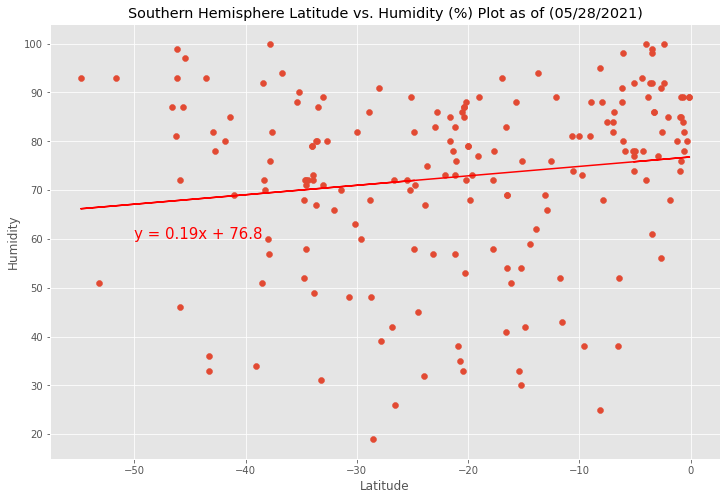

In [73]:
#Southern Hemisphere: Lat vs Humidity...linear regerssion
# Set x and y values
x_values = s_hem
y_values = s_hem_hum

# Calculate regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

#  title and labels
plt.title(f"Southern Hemisphere Latitude vs. Humidity (%) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

0.009209686380706985


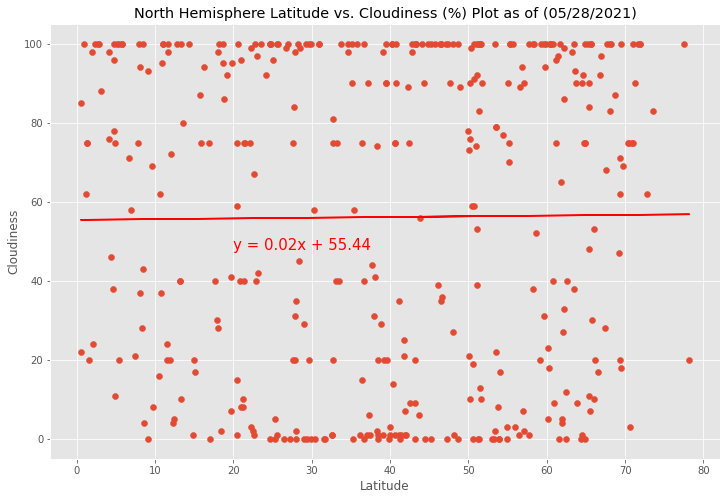

In [75]:
#Northern hemisphere: cloudiness vs lat...linear regression
# Set x and y values
x_values = n_hem
y_values = n_hem_cloud

# regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,48),fontsize=15,color="red")

# Create title and labels
plt.title(f"North Hemisphere Latitude vs. Cloudiness (%) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(rvalue)

-0.09884687259110839


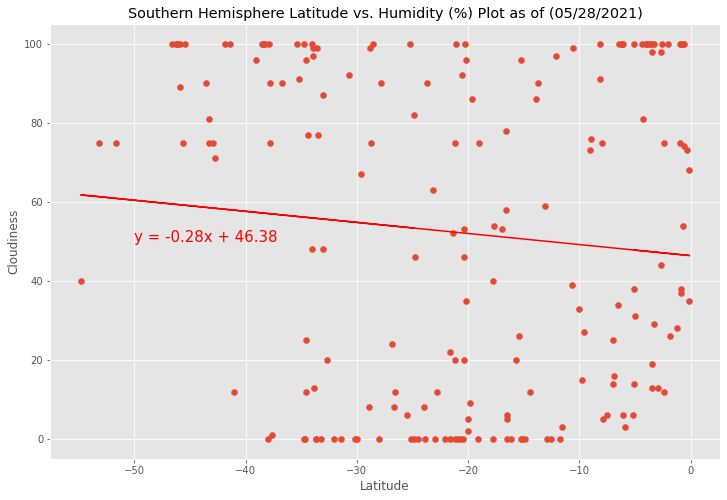

In [76]:
#Southern Hemisphere: cloudiness vs lat...linear regression
# Set x and y values
x_values = s_hem
y_values = s_hem_cloud

#regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Create title and labels
plt.title(f"Southern Hemisphere Latitude vs. Humidity (%) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(rvalue)

-0.005734864477287001


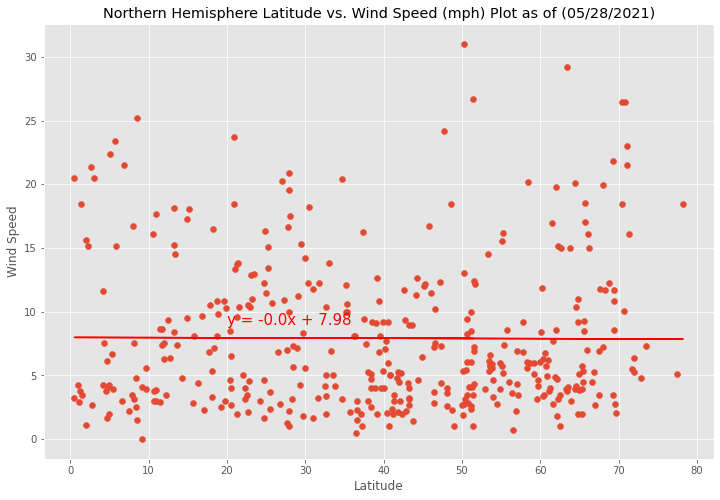

In [77]:
#Northern Hemisphere: wind speed vs lat ... linear regression
#Set x and y values
x_values = n_hem
y_values = n_hem_wind

#regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 9),fontsize=15,color="red")

# Create tile and labels
plt.title(f"Northern Hemisphere Latitude vs. Wind Speed (mph) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(rvalue)

-0.2109803529939191


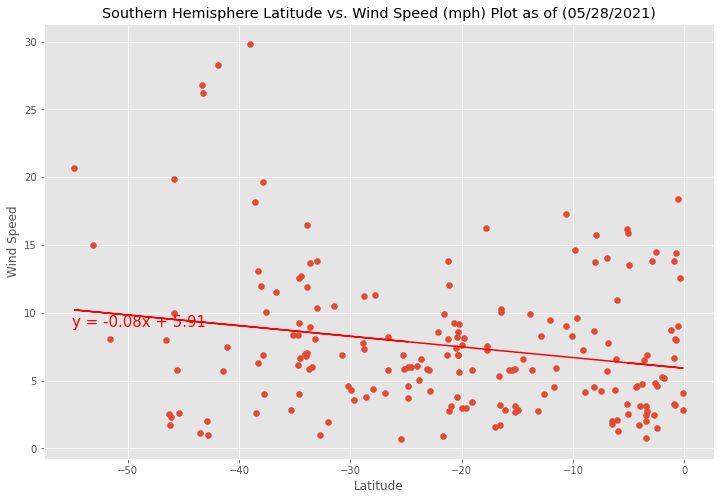

In [78]:
#Southern Hemisphere: lat vs wind... linear regression
#Set x and y values
x_values = s_hem
y_values = s_hem_wind

#regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 9),fontsize=15,color="red")

#title and labels
plt.title(f"Southern Hemisphere Latitude vs. Wind Speed (mph) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(rvalue)